DATA UNDERSTANDING

On the training sheet, there are six attributes: Age, Gender, Marital_Status, Employment, Housing, and Car_Type.

On the scoring sheet, there are five attributes: Age, Gender, Marital_Status, Employment, Housing

List 30 people that you know who owns a vehicle, input their six attributes in the training sheets.

Same goes for scoring sheet, but 20 people who doesn't own a vehicle, input their five attributes on the scoring sheet.

a. For Age, you could put the person’s actual age in years, or you could put
them in buckets. For example, you could put 10 for people aged 10-19; 20 for
people aged 20-29; etc.

b. For Gender, enter 0 for female and 1 for male.

c. For Marital_Status, use 0 for single, 1 for married, 2 for divorced, and 3 for widowed.

d. For Employment, enter 0 for student, 1 for full-time, 2 for part-time, and 3 for retired.

e. For Housing, use 0 for lives rent-free with someone else, 1 for rents housing, and 2 for owns housing.

f. For Car_Type,You can classifying the brand of the vehicle if it's Japanese, American, or European.

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load training data from CSV
training_data = pd.read_csv('/content/Training.csv')

training_data.info()
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30 non-null     int64 
 1   Gender          30 non-null     int64 
 2   Marital_Status  30 non-null     int64 
 3   Employment      30 non-null     int64 
 4   Housing         30 non-null     int64 
 5   Car_Type        30 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


,Age,Gender,Marital_Status,Employment,Housing
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,39.166667,0.600000,0.966667,1.566667,1.633333
std,13.411481,0.498273,0.927857,1.006302,0.490133
min,20.000000,0.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,1.000000,1.000000
50%,36.500000,1.000000,1.000000,1.000000,2.000000
75%,49.250000,1.000000,1.000000,2.000000,2.000000
max,68.000000,1.000000,3.000000,3.000000,2.000000


In [2]:
# Load scoring data from CSV
scoring_data = pd.read_csv('/content/Scoring.csv')

scoring_data.info()
scoring_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             20 non-null     int64
 1   Gender          20 non-null     int64
 2   Marital_Status  20 non-null     int64
 3   Employment      20 non-null     int64
 4   Housing         20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


,Age,Gender,Marital_Status,Employment,Housing
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,34.000000,0.550000,1.050000,1.250000,1.200000
std,12.460464,0.510418,0.944513,0.910465,0.833509
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,24.750000,0.000000,0.000000,1.000000,0.750000
50%,31.500000,1.000000,1.000000,1.000000,1.000000
75%,39.250000,1.000000,1.250000,2.000000,2.000000
max,63.000000,1.000000,3.000000,3.000000,2.000000


MODELING

We will use the train sheets to determine the people from the scoring sheets on which car type they could possibly own.

In [3]:
# Assuming the last column is the target variable
X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1]

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Now, use the trained model to predict the target variable for the new data
score_predictions = lda.predict(scoring_data)

# Create a new DataFrame with the original features and predicted labels
score_results = pd.DataFrame(data=scoring_data)
score_results['Car_Type'] = score_predictions

# Count the number of examples per prediction class
class_counts = score_results['Car_Type'].value_counts()

# Display the scoring data with predictions and counts
print("Scoring Data with Predictions and Class Counts:")
print(score_results)
print("\nNumber of examples per prediction class:")
print(class_counts)

Scoring Data with Predictions and Class Counts:
    Age  Gender  Marital_Status  Employment  Housing  Car_Type
0    22       1               0           1        0  European
1    31       0               1           2        2  Japanese
2    41       1               2           1        2  American
3    23       0               1           0        0  European
4    21       1               3           3        0  European
5    56       0               1           2        2  American
6    33       1               0           1        2  American
7    25       0               1           1        1  European
8    39       1               1           1        2  American
9    28       1               0           0        1  European
10   57       0               2           2        1  European
11   32       1               1           2        2  Japanese
12   28       0               1           1        1  European
13   36       1               0           1        1  Japanese
14   40

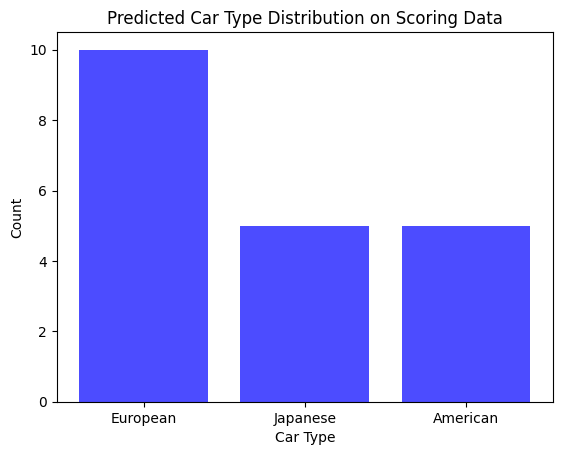

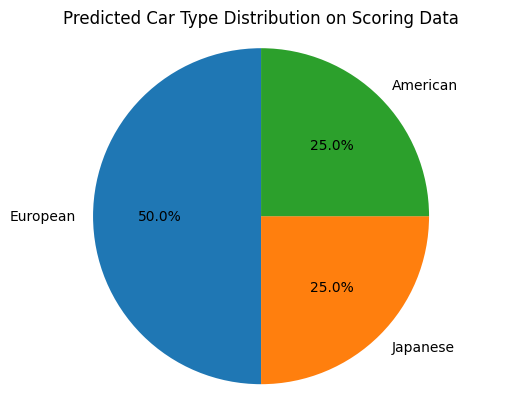

In [8]:
# Plot the bar chart
plt.bar(class_counts.index, class_counts.values, color='blue', alpha=0.7)
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.title('Predicted Car Type Distribution on Scoring Data')
plt.show()


# Plot the pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Predicted Car Type Distribution on Scoring Data')
plt.show()

EVALUATION

Based on the result of the model, Among the 20 people who's never had a car, 10 of them could possibly own a European car, while 5 of them could possibly own a Japanese or American car.


DEPLOYMENT

The predictions generated from the analysis can now be utilized to provide personalized insights for each individual. With this results, we can predict the type of car each person is most likely to drive. This information might be particularly useful for targeted marketing strategies or further behavioral studies.

This deployment phase underscores the cyclical nature of the CRISP-DM methodology: the predictions serve as a foundation for further exploration, whether by collecting additional data or refining the existing model. By actively engaging with the results, stakeholders can continuously enhance their understanding and application of the insights generated.